## Load Packages

In [2]:
# Import required Python Packages to perform exploratory data analysis and visualize the data
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

## Load the dataset

In [62]:
df_train = pd.read_csv("aug_train.csv")

## Basic Checks on Dataframe

In [6]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [7]:
df_train.shape

(382154, 12)

There are 382,154 rows and 12 columns in this Insurance Analysis dataset

In [8]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


## Numerical and Categorical Features

In [10]:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


## Statistics about the data

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382154.0,234392.953477,139527.487326,1.0,115006.25,230461.5,345434.75,508145.0
Age,382154.0,38.545691,15.226897,20.0,25.00,36.0,49.00,85.0
Driving_License,382154.0,0.998108,0.043455,0.0,1.00,1.0,1.00,1.0
Region_Code,382154.0,26.406867,13.181241,0.0,15.00,28.0,35.00,52.0
Previously_Insured,382154.0,0.489182,0.499884,0.0,0.00,0.0,1.00,1.0
Annual_Premium,382154.0,30711.271362,17061.595532,2630.0,24546.00,31692.0,39447.75,540165.0
Policy_Sales_Channel,382154.0,111.939812,54.286511,1.0,26.00,145.0,152.00,163.0
Vintage,382154.0,154.189429,83.735107,10.0,81.00,154.0,227.00,299.0
Response,382154.0,0.163811,0.370104,0.0,0.00,0.0,0.00,1.0


In [12]:
df_train.describe(include=['O'])

,Gender,Vehicle_Age,Vehicle_Damage
count,382154,382154,382154
unique,2,3,2
top,Male,1-2 Year,No
freq,205603,200176,198501


## Check for Nulls

In [13]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
df_train.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

## Unique Data Checks

In [15]:
for col in df_train.columns:
    print(f'The column {col} has {df_train[col].nunique()} unique values')

The column id has 382154 unique values
The column Gender has 2 unique values
The column Age has 66 unique values
The column Driving_License has 2 unique values
The column Region_Code has 53 unique values
The column Previously_Insured has 2 unique values
The column Vehicle_Age has 3 unique values
The column Vehicle_Damage has 2 unique values
The column Annual_Premium has 48993 unique values
The column Policy_Sales_Channel has 156 unique values
The column Vintage has 290 unique values
The column Response has 2 unique values


In [16]:
# Let's explore Driving License column
df_train.Driving_License.unique()

array([1, 0])

In [17]:
# There are two values 0 and 1. 
df_train.Gender.value_counts()

Gender
Male      205603
Female    176551
Name: count, dtype: int64

In [18]:
# Similarly, let's explore Previously Insured column
df_train.Previously_Insured.unique()

array([1, 0])

In [19]:
# There are two values 0 and 1. 
df_train.Previously_Insured.value_counts()

Previously_Insured
0    195211
1    186943
Name: count, dtype: int64

In [20]:
# Simiarly, let's explore Vehicle Damage column
df_train.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
# There are two values 'Yes' and 'No'. 
df_train.Vehicle_Damage.value_counts()

Vehicle_Damage
No     198501
Yes    183653
Name: count, dtype: int64

In [22]:
# Let's also explore Vehicle Age column
df_train.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [23]:
# There are three values '< 1 Year', '1-2 Year' and '> 2 Years'. 
df_train.Vehicle_Age.value_counts()

Vehicle_Age
1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: count, dtype: int64

Quick observation. Most of the cars are less than 2 years old

## Plot Graphs - Histogram

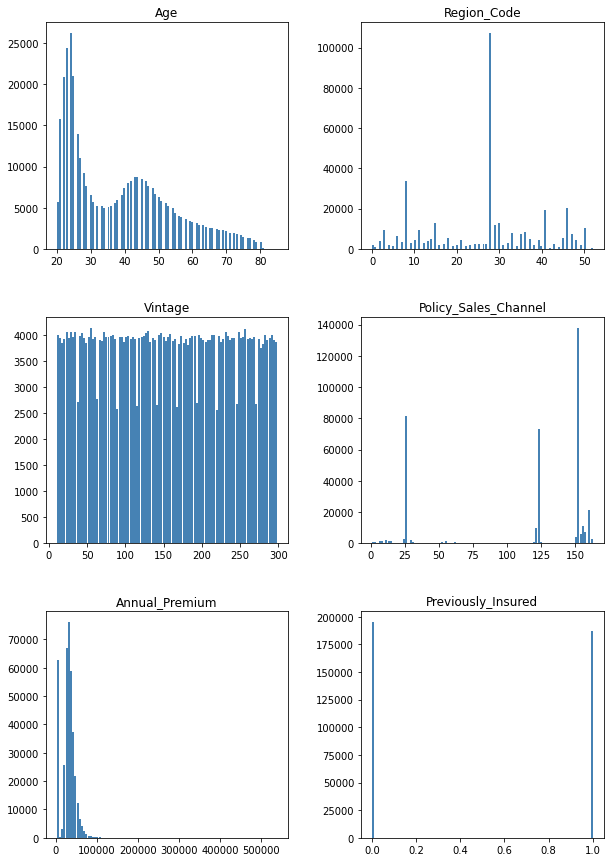

In [24]:
df_train.hist(column=['Age','Region_Code',
                      'Vintage','Policy_Sales_Channel',
                      'Annual_Premium', 'Previously_Insured'], 
              color='steelblue', # many options, some to consider are
                            # ['aqua', 'red', 'gold', 'royalblue', 
                            #'darkorange', 'green', 'purple', 
                            #'steelblue', 'yellow', 'lime', 'magenta']
              #edgecolor='black', # color of the edge line for the bars
              figsize=(10,15), #(x axis and y axis in inches)
              bins=100, # number of bins to divide the data into
              rwidth=0.9, # width between each bin
              grid=False # to remove the grid for cleaner visualization
             )
plt.show()

In [25]:
print('Annual Premium : Min =', df_train['Annual_Premium'].min(), 
      'and Max =',df_train['Annual_Premium'].max())

Annual Premium : Min = 2630.0 and Max = 540165.0


In [26]:
df_train = df_train.sort_values(by = 'Region_Code' )

In [27]:
# Total number of rows above Annual Premium of 100,000
xc = df_train.loc[df_train['Annual_Premium'] > 100000, ['Annual_Premium']].count()
print('Total number of records with Annual Premium above 100,000 is', xc[0])

Total number of records with Annual Premium above 100,000 is 793


In [28]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
82215,80755,Male,53,1,0.0,0,1-2 Year,Yes,2630.0,61.0,20,0
356596,79871,Male,49,1,0.0,0,> 2 Years,Yes,2630.0,26.0,120,0
79751,386084,Male,36,1,0.0,1,1-2 Year,No,2630.0,124.0,48,0
138015,176240,Male,46,1,0.0,0,> 2 Years,Yes,2630.0,124.0,173,1
344768,419531,Female,44,1,0.0,1,1-2 Year,No,2630.0,26.0,59,0


In [29]:
df_train[(df_train['Gender'] == 'Male') | (df_train["Age"] == 53)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
82215,80755,Male,53,1,0.0,0,1-2 Year,Yes,2630.0,61.0,20,0
356596,79871,Male,49,1,0.0,0,> 2 Years,Yes,2630.0,26.0,120,0
79751,386084,Male,36,1,0.0,1,1-2 Year,No,2630.0,124.0,48,0
138015,176240,Male,46,1,0.0,0,> 2 Years,Yes,2630.0,124.0,173,1
309178,292189,Male,46,1,0.0,0,1-2 Year,Yes,2630.0,124.0,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...
290340,492646,Male,62,1,52.0,1,1-2 Year,No,22114.0,4.0,24,0
313121,320377,Male,43,1,52.0,1,1-2 Year,No,33692.0,26.0,23,0
169830,265351,Male,55,1,52.0,0,1-2 Year,Yes,2630.0,124.0,274,0
288690,284044,Male,44,1,52.0,1,1-2 Year,No,56788.0,26.0,244,0


In [30]:
# Let's pull all data below 100,000 and plot them to zoom into the tall bar for Annual Premium
x_AP = df_train.loc[df_train['Annual_Premium'] <= 100000]

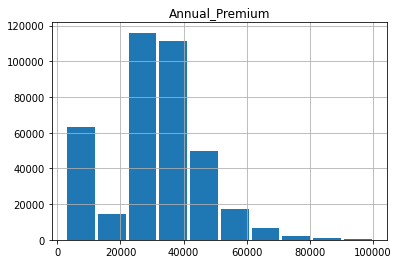

In [31]:
# Zoom into the Annual Premium below 100,000 

x_AP.hist(column=['Annual_Premium'], 
               bins = 10,
               rwidth=0.9, # width between each bin
               grid=True # to remove the grid for cleaner visualization
              )
plt.show()

## Plot Graphs - Bar Graph

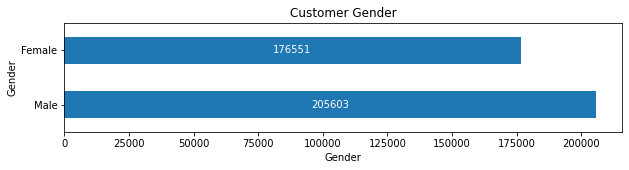

In [32]:
# Let's look at the break up of Gender in the dataset

ax = df_train.Gender.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Customer Gender')
plt.xlabel('Gender')
plt.show()

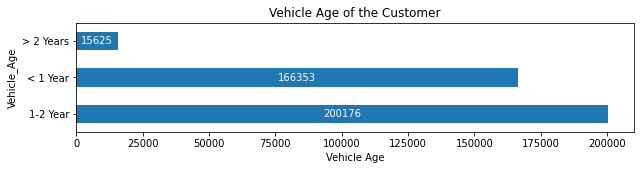

In [33]:
# Let's also look at the Vehicle Age and see how these are broken up

ax = df_train.Vehicle_Age.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Vehicle Age of the Customer')
plt.xlabel('Vehicle Age')
plt.show()

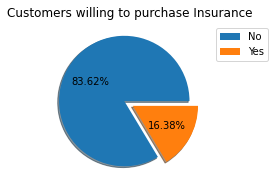

In [34]:
# Let's look at Response and how Customers feel about purchasing Vehicle Insurance

ax = df_train.Response.value_counts().plot(kind='pie', figsize=(10,3), 
                                        grid=False, ylabel='',
                                        labels = ['No', 'Yes'],
                                        shadow=True, explode=[0.1, 0.05],
                                        legend=True, labeldistance=None, 
                                        autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Customers willing to purchase Insurance')
plt.show()

## Plot Graphs - KDEs (Kernal Desity Estimate)

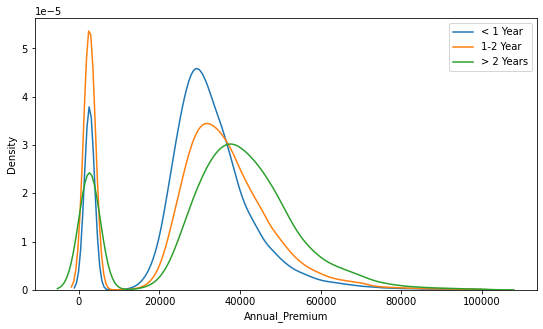

In [35]:
# Let's plot the KDE of Annual Premium based on vehicle age for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(data = x_AP[x_AP.Vehicle_Age == '< 1 Year'], x ="Annual_Premium", ax = ax)
sns.kdeplot(x_AP[x_AP.Vehicle_Age == '1-2 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Vehicle_Age == '> 2 Years']["Annual_Premium"], ax = ax)
plt.legend(['< 1 Year', '1-2 Year', '> 2 Years'])
plt.show()

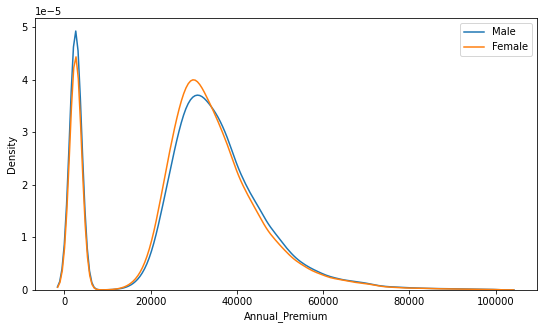

In [36]:
# Let's plot the KDE of Annual Premium based on Gender for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(x_AP[x_AP.Gender == 'Male']["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Gender == 'Female']["Annual_Premium"], ax = ax)
plt.legend(['Male', 'Female'])
plt.show()

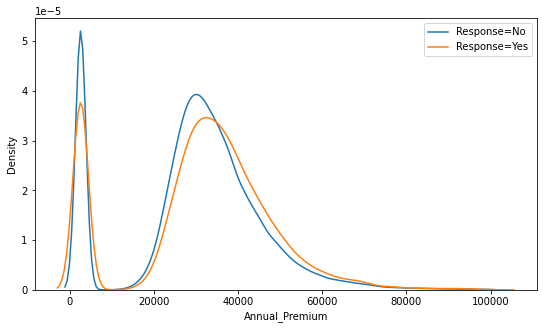

In [37]:
# Let's plot the KDE of Annual Premium based on Response for premium below 100,000

f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(x_AP[x_AP.Response == 0]["Annual_Premium"], ax = ax)
sns.kdeplot(x_AP[x_AP.Response == 1]["Annual_Premium"], ax = ax)
plt.legend(['Response=No', 'Response=Yes'])
plt.show()

## Plot Graphs - Heat Map

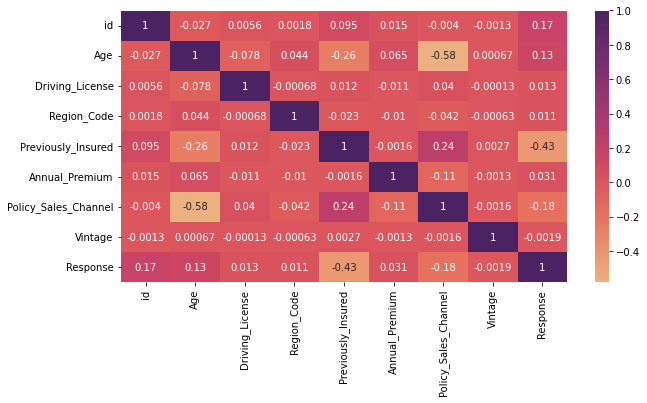

In [38]:
# Let's create a HeatMap to correlate numerical features

plt.figure(figsize=(10,5))
corr = df_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='flare');

## Skewness in Data

In [39]:
# We know Annual Premium is skewed. Let's create a function to bin the values into a group
# We will convert the premium to a series of numbers. This will help us with better analysis
# For ex: 0-999 will be 1; 1,000 - 1,999 will be 2, .... until 99,000 - 99,999 will be 100
# all others values above 99,999 will be set to 999

def bin_annual_premium(row_val):
    if  row_val >= 100000:
        return 999
    else:
        x = int((row_val // 1000) + 1)
        return x

df_train['Premium_Bin'] = df_train['Annual_Premium'].apply(bin_annual_premium)
df_train[['Annual_Premium','Premium_Bin']]

,Annual_Premium,Premium_Bin
82215,2630.0,3
356596,2630.0,3
79751,2630.0,3
138015,2630.0,3
344768,2630.0,3
...,...,...
313121,33692.0,34
169830,2630.0,3
288690,56788.0,57
261032,44300.0,45


In [40]:
df_train.Premium_Bin.unique()

array([  3,  45,  28,  60,  68,  37,  51,  43,  40,  30,  46,  26,  55,
        39,  27,  34,  32,  31,  23,  42,  33,  29,  25,  22,  18,  20,
        38,  36,  35,  41,  24,  19,  44,  21,  54,  16,  47,  49,  48,
        57,  56,  17,  14,  15,  52,  13,  53,  62,  50,  61,  74,  82,
        58,  78,  59, 999,  63,  12,  65,  76,  86,  72,  83,  64,  71,
        90,  67,  79,  69,  70,  75,  66,  73,  88,  94,  77,  93,  92,
        81,  87,  80,  85,  99,  98,  95,  84, 100,  97,  91,  89,  96,
         7,  11,  10,   8])

In [41]:
# now let's drop Annual_Premium from the dataframe for simpler analysis
df_train.drop('Annual_Premium', axis='columns', inplace=True)

In [42]:
# We need to remove 'Annual_Premium' from the numerical_features list
# We need to add Premium_Bin instead to the numerical_features list
numerical_features.remove('Annual_Premium')
numerical_features.append('Premium_Bin')

## Encoding Categorical Columns

In [44]:

# make an instance of Label Encoder
label_encoder = LabelEncoder()

# transform 'Gender' from Object to Numeric using fit_transform
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
df_train['Vehicle_Age'] = label_encoder.fit_transform(df_train['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
df_train['Vehicle_Damage'] = label_encoder.fit_transform(df_train['Vehicle_Damage'])

# Let's look at the top 10 rows to see how the transformation helped
df_train.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Premium_Bin
82215,80755,1,53,1,0.0,0,0,1,61.0,20,0,3
356596,79871,1,49,1,0.0,0,2,1,26.0,120,0,3
79751,386084,1,36,1,0.0,1,0,0,124.0,48,0,3
138015,176240,1,46,1,0.0,0,2,1,124.0,173,1,3
344768,419531,0,44,1,0.0,1,0,0,26.0,59,0,3


All the columns are now numeric columns.

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382154 entries, 82215 to 299360
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  int64  
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  int64  
 7   Vehicle_Damage        382154 non-null  int64  
 8   Policy_Sales_Channel  382154 non-null  float64
 9   Vintage               382154 non-null  int64  
 10  Response              382154 non-null  int64  
 11  Premium_Bin           382154 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 37.9 MB


In [46]:
# Let's reset the values in numerical_features based on new changes we made
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)
numerical_features

The numerical features in the Insurance Dataset are:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Premium_Bin']


['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Vintage',
 'Response',
 'Premium_Bin']

## Box Plot : Training Dataset

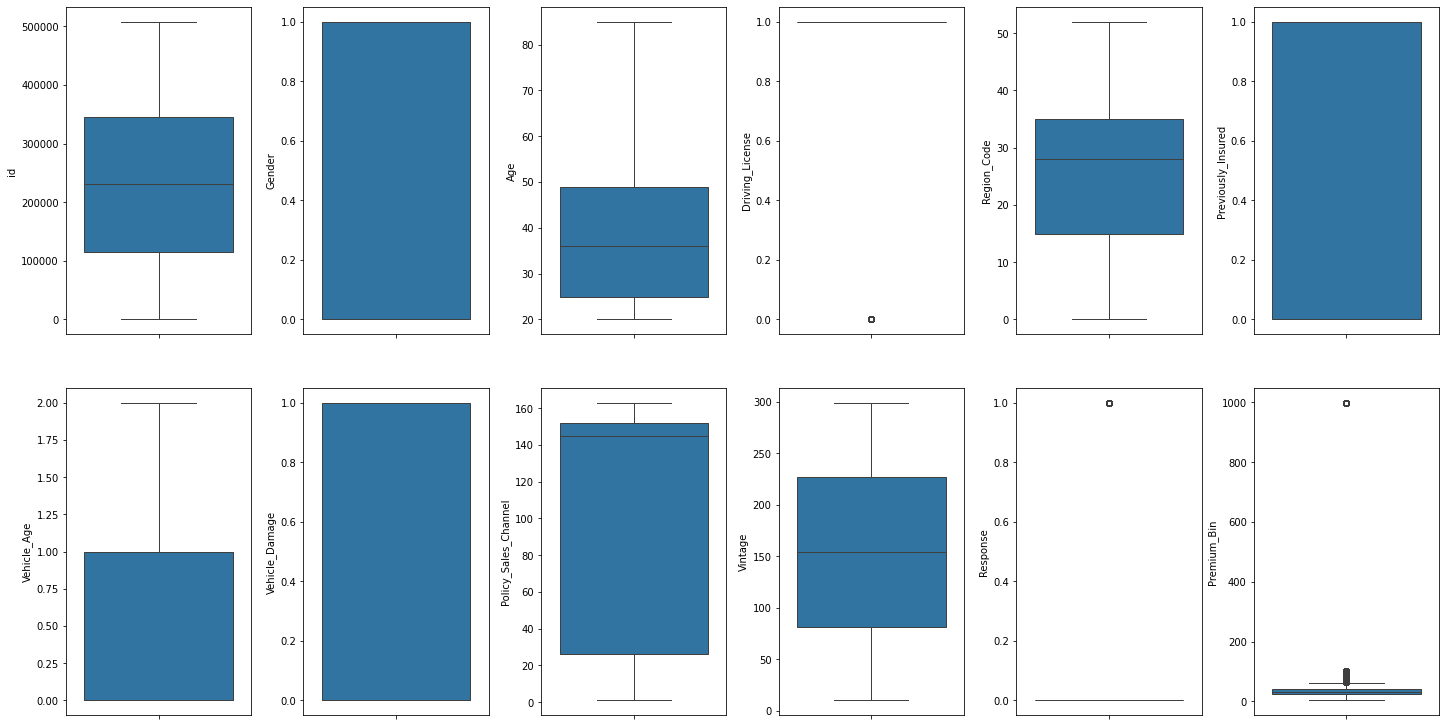

In [47]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
    sns.boxplot(y=k, data=df_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

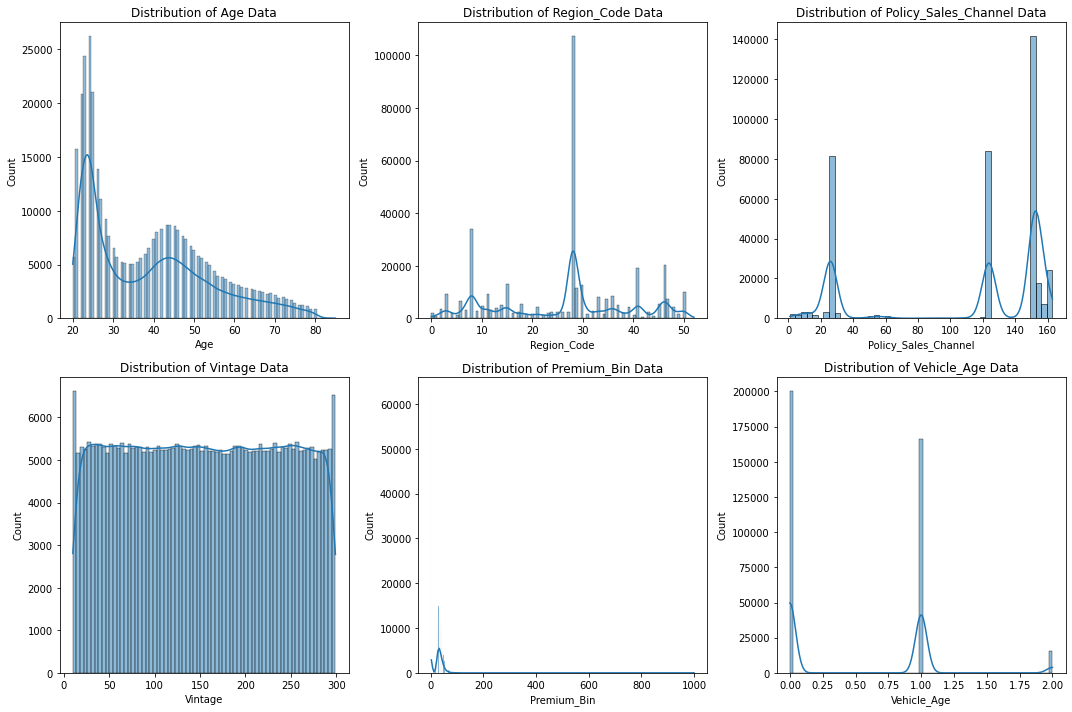

In [48]:
col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel', 
            'Vintage', 'Premium_Bin','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

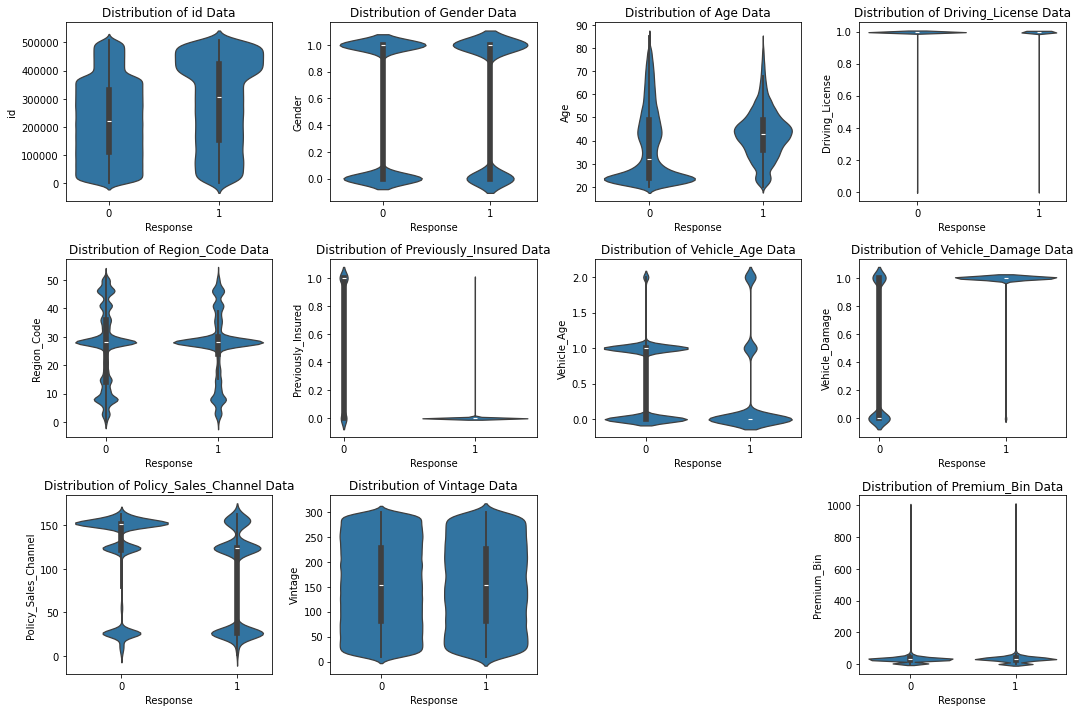

In [49]:
# We know that some features are contributing to the decision whether the customer will
# purchase vehicle insurance or now.
# Let's plot a Violin plot to see the data in comparison with 'Response' column
# We have 12 attributes with 1 attribute as 'Response'. 
# Let's plot the violin graph excluding the 'Response' column
# Plotting in a 3x4 matrix

plt.figure(figsize=(15,10))
for i,col in enumerate(df_train.columns,1):
    if col=='Response': continue
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.violinplot(data=df_train, x='Response', y=df_train[col])
    plt.tight_layout()
    plt.plot()

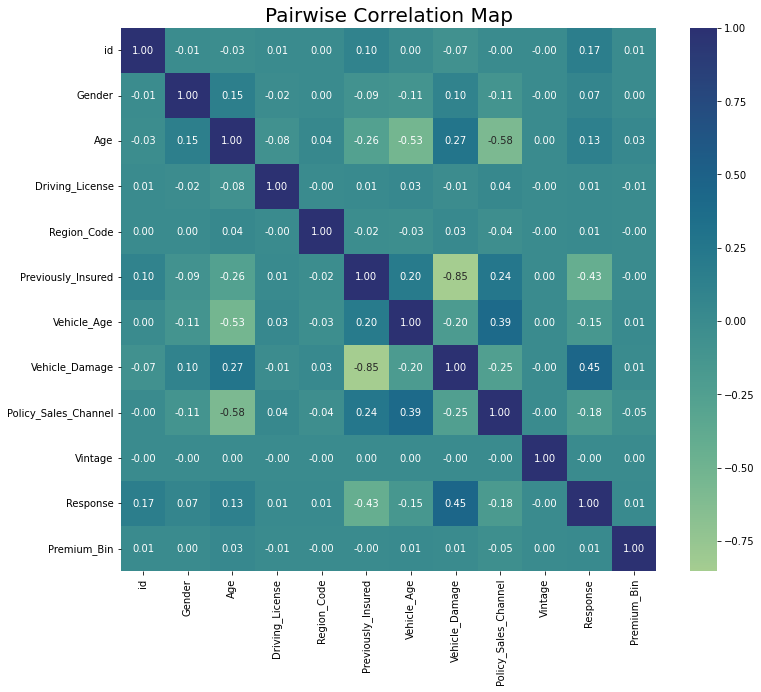

In [50]:
# Having analyzed all the data, let's revisit the pairwise correlation mapping 

plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

## Relationship between Region and Response

In [53]:
df_train.head().T

,82215,356596,79751,138015,344768
id,80755.0,79871.0,386084.0,176240.0,419531.0
Gender,1.0,1.0,1.0,1.0,0.0
Age,53.0,49.0,36.0,46.0,44.0
Driving_License,1.0,1.0,1.0,1.0,1.0
Region_Code,0.0,0.0,0.0,0.0,0.0
Previously_Insured,0.0,0.0,1.0,0.0,1.0
Vehicle_Age,0.0,2.0,0.0,2.0,0.0
Vehicle_Damage,1.0,1.0,0.0,1.0,0.0
Policy_Sales_Channel,61.0,26.0,124.0,124.0,26.0
Vintage,20.0,120.0,48.0,173.0,59.0


In [63]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [64]:
pd.pivot_table(df_train, 
               index = ['Region_Code'], 
               columns = ['Vehicle_Age'], 
               values=['id'], 
               aggfunc = {'id':len})

id                   
Vehicle_Age 1-2 Year < 1 Year > 2 Years
Region_Code                            
0.0             1638       97       104
1.0              713      177        50
2.0             1090     2588        45
3.0             4662     4428       186
4.0             1123      658        44
5.0              443      732        38
6.0             1508     5005        52
7.0             2078     1104       102
8.0            17340    15564      1037
9.0             1173     1674        89
10.0            1000     3448        61
11.0            3622     5633       137
12.0            1187     1914        61
13.0            1259     2711        60
14.0            1809     3001        74
15.0            4407     8495       169
16.0             522     1450        29
17.0             960     1519        38
18.0            2588     2701       103
19.0            1059      338        76
20.0            1366      237       107
21.0            1214     3189        28
22.0             441      802        18
23.0            1154      802        49
24.0            1442      872        71
25.0             584     1865        22
26.0            1132     1233        73
27.0             651     1868        25
28.0           78979    18678      9542
29.0            5360     6071       219
30.0            4001     8630       111
31.0            1192      467        93
32.0             679     2014        21
33.0            3922     3883       203
34.0             500     1009        34
35.0            3443     3670       141
36.0            2645     5871       103
37.0            1589     3334        93
38.0            1638      314        62
39.0            2587     1704       185
40.0             550      652        40
41.0            8735     9968       387
42.0             232      323        12
43.0            1362     1155        63
44.0             173      604         7
45.0            2442     2992       121
46.0            9836     9868       499
47.0            2941     4128       182
48.0            3730      325       278
49.0             478     1203        28
50.0            4690     5262       224
51.0             129       54        13
52.0             178       69        16

In [51]:
# There are 53 Region Codes. Let's review the relationship between Region Code and Response

# Explore relationship between Region Code and Response

region_unique = sorted(df_train.Region_Code.unique())
region_unique = np.array(region_unique, dtype=int)
# region_unique has the 53 unique region codes

region_response_values=df_train.groupby('Region_Code')['Response'].count().values
mean_resp=[]
for i,region in enumerate(region_unique):
    mean_resp.append(sum(df_train[df_train['Region_Code']==region].Response)/region_response_values[i])

mc = df_train.groupby('Region_Code')['Response'].mean()

Region_Code
0.0     0.078847
1.0     0.106383
2.0     0.093204
3.0     0.173135
4.0     0.208219
5.0     0.142622
6.0     0.084082
7.0     0.173264
8.0     0.127810
9.0     0.084128
10.0    0.072965
11.0    0.147998
12.0    0.119861
13.0    0.119851
14.0    0.120188
15.0    0.090276
16.0    0.067966
17.0    0.086611
18.0    0.177671
19.0    0.234216
20.0    0.107018
21.0    0.081246
22.0    0.067407
23.0    0.206484
24.0    0.190356
25.0    0.038851
26.0    0.075062
27.0    0.088050
28.0    0.262922
29.0    0.171073
30.0    0.091273
31.0    0.098174
32.0    0.105748
33.0    0.134366
34.0    0.088140
35.0    0.174387
36.0    0.104653
37.0    0.096093
38.0    0.279047
39.0    0.169571
40.0    0.139291
41.0    0.159874
42.0    0.084656
43.0    0.105814
44.0    0.043367
45.0    0.148335
46.0    0.133941
47.0    0.106606
48.0    0.092546
49.0    0.071387
50.0    0.065252
51.0    0.214286
52.0    0.174905
Name: Response, dtype: float64

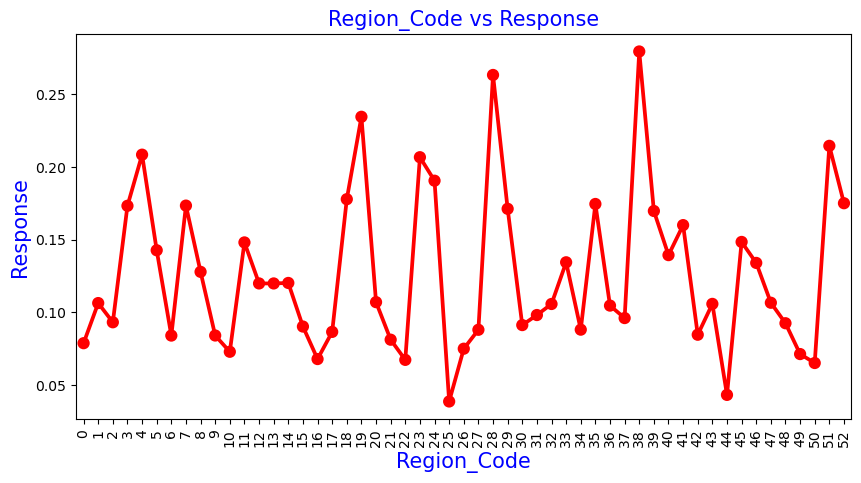

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x=region_unique,y=mean_resp,color='red') #,alpha=0.8
plt.xlabel('Region_Code',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Response',fontsize = 15,color='blue')
plt.title('Region_Code vs Response',fontsize = 15,color='blue')
plt.show()

The above graph shows that there are some regions where Response = 1 (Customers willing to take Vehicle Insurance) is higher. Howver, there are regions where customers are not interested in the Vehicle Insurance. Examples are: Region 25 and 44. There are two regions where a higher volume of customers are interested in the Vehicle Insurance. Regions 28 stands out clearly as a winner

In [51]:
# Let's explore Region_Code 25 and 
# see how many in this region are interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 25.0) & (df_train['Response'] == 1)]['Response'].count()

96

In [52]:
# Let's also see how many are NOT interested in the Vehicle Insurance
df_train[(df_train['Region_Code'] == 25.0) & (df_train['Response'] == 0)]['Response'].count()

2375

#### Observation:

We find that there are 96 interested in the Vehicle Insurance and 2375 NOT interested in the Vehicle Insurance

- We have a total of 96 + 2375 = 2471 individuals in Region 25.0
- We have 96 / 2471 = 4% (0.039) interested in the Vehicle Insurance.
- We have 2375 / 2471 = 96% (0.961) NOT interested in the Vehicle Insurance

In [53]:
# Let's also explore Region_Code 38 and 
# see how many in this region are interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 38.0) & (df_train['Response'] == 1)]['Response'].count()

562

In [54]:
# Let's also see how many are NOT interested in the Vehicle Insurance
df_train[(df_train['Region_Code'] == 38.0) & (df_train['Response'] == 0)]['Response'].count()

1452

For Region 38, we have: 
- 562 (28%) intersted in the Vehichle Insuarnce and 
- 1452 (72%) NOT interested in the Vehicle Insuarance offer

In [55]:
# Let's also explore Region_Code 38 and 
# see how many in this region are interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 28.0) & (df_train['Response'] == 1)]['Response'].count()

28185

In [56]:
# Let's also see how many are NOT interested in the Vehicle Insurance

df_train[(df_train['Region_Code'] == 28.0) & (df_train['Response'] == 0)]['Response'].count()

79014

For Region 38, we have: 
- 28185 (26%) intersted in the Vehichle Insuarnce and 
- 79014 (74%) NOT interested in the Vehicle Insuarance offer
add

## Removing outliers 

### Remove outliners from Annual Premium and performing EDA

In [57]:
df_no_outlier = df_train.loc[df_train['Premium_Bin'] != 999]
df_no_outlier.shape

(381361, 12)

In [58]:
df_train.loc[df_train['Premium_Bin'] == 999].shape

(793, 12)

## Histogram - Excludes outliers

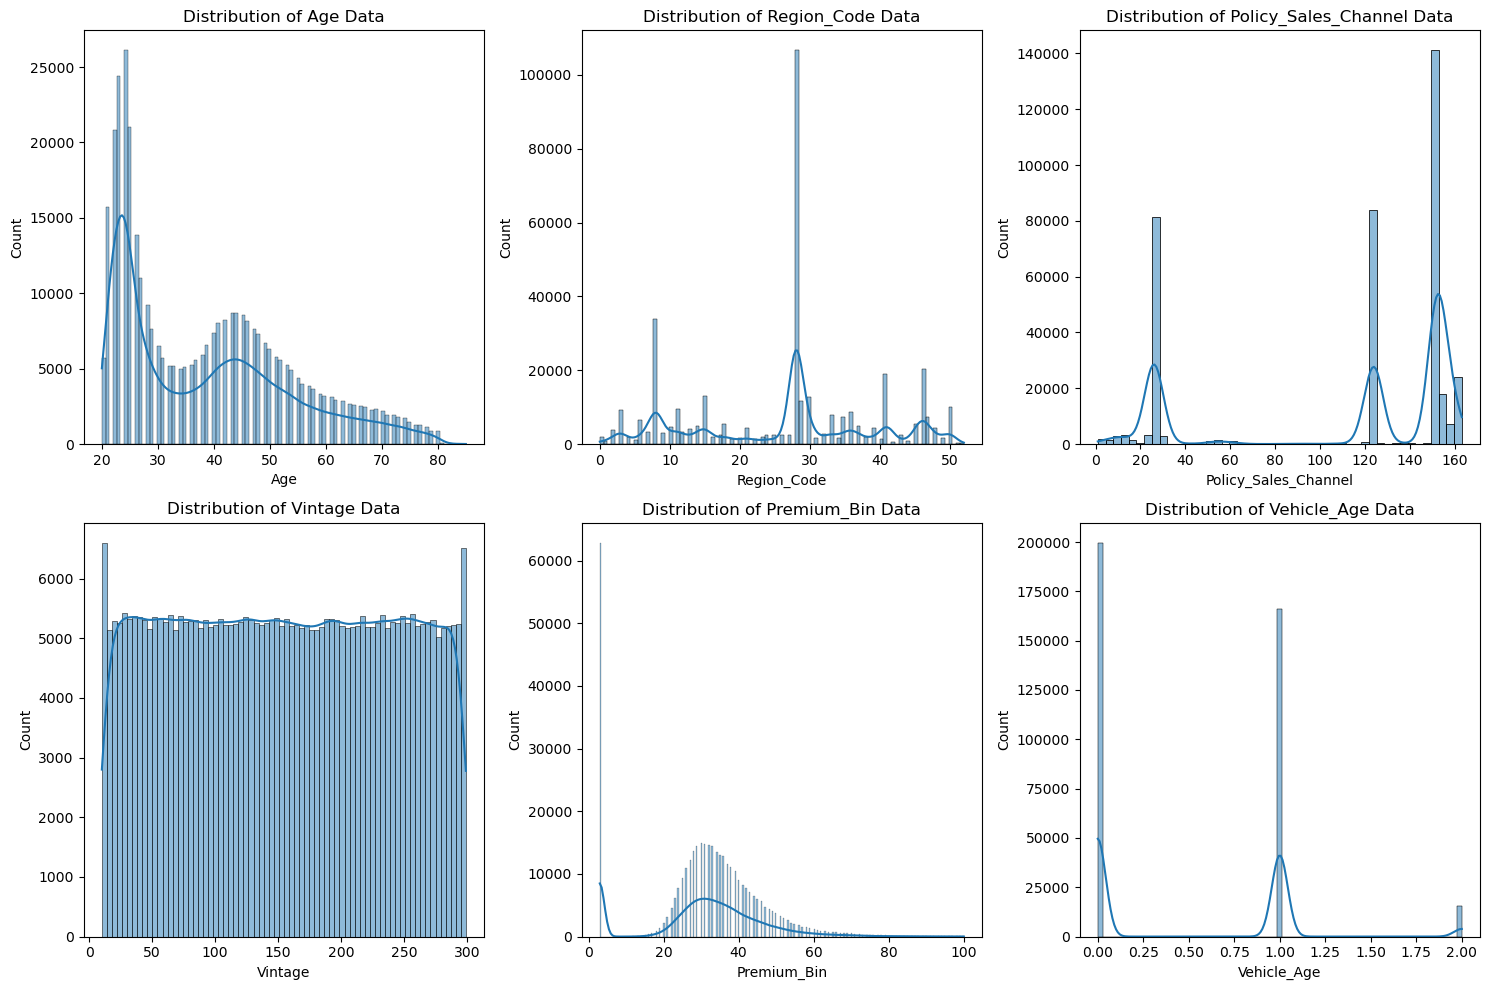

In [59]:
# Let's plot the distribution grap and look at the skewness of the feature using the Kernel Density Estimate (kde)
# This time we will do the exercise on the no outlier data 'df_no_outlier'

col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel', 
            'Vintage', 'Premium_Bin','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_no_outlier[col],kde=True)
    plt.tight_layout()
    plt.plot()

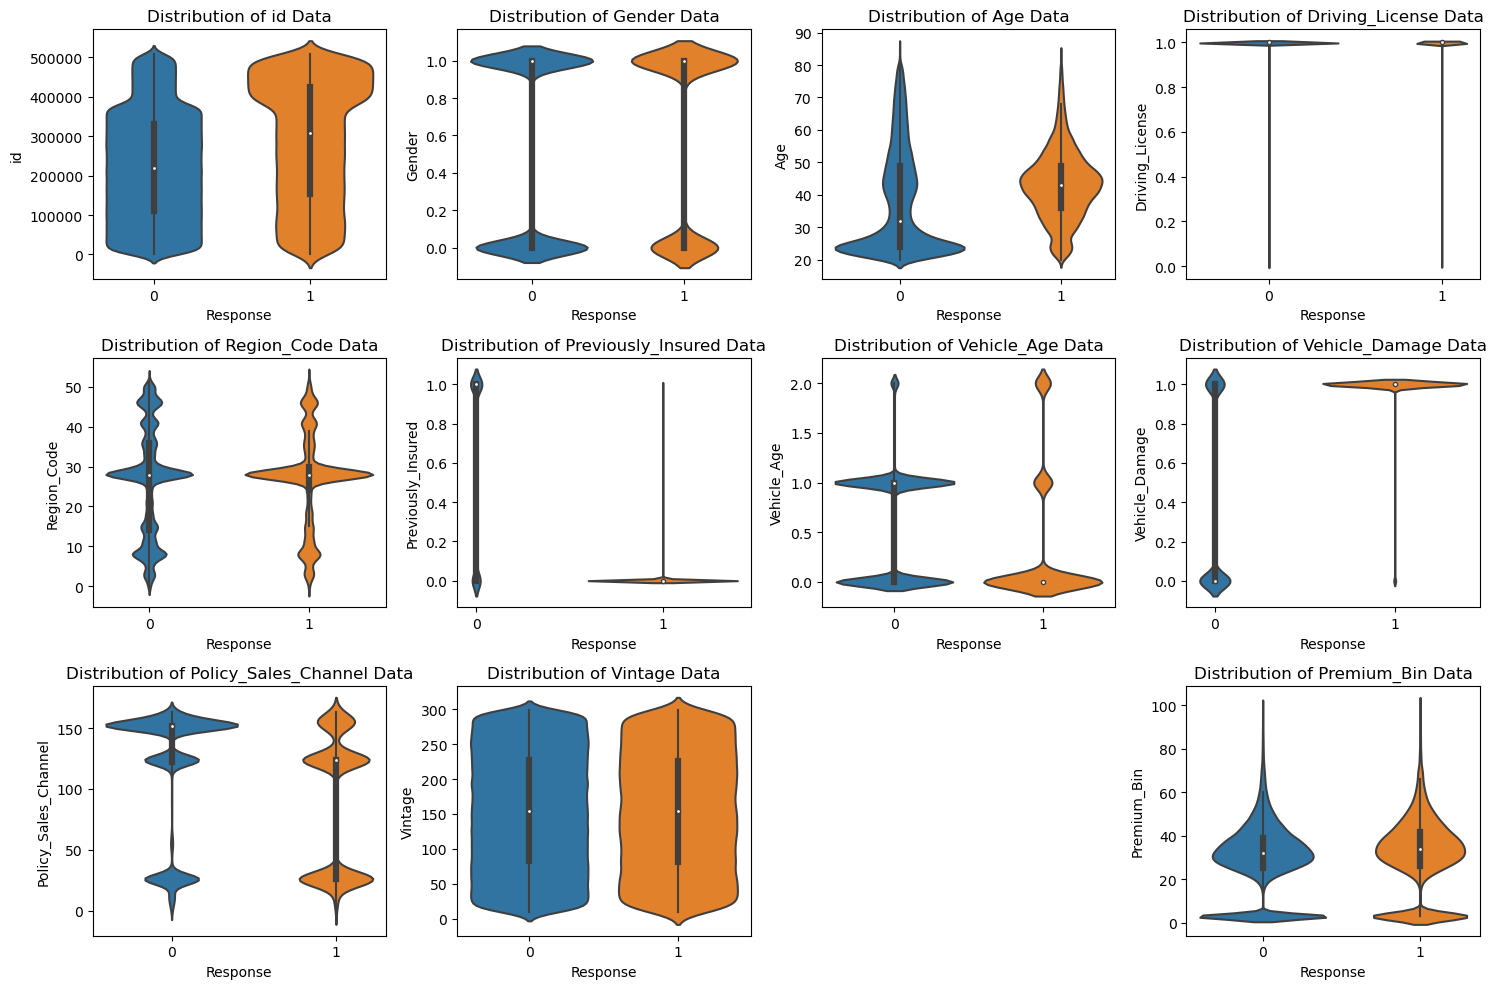

In [60]:
# We know that some features are contributing to the decision whether the customer will
# purchase vehicle insurance or now.
# Let's plot a Violin plot to see the data in comparison with 'Response' column
# We have 12 attributes with 1 attribute as 'Response'. 
# Let's plot the violin graph excluding the 'Response' column
# Plotting in a 3x4 matrix

# Performing this analysis on df_no_outlier dataset.

plt.figure(figsize=(15,10))
for i,col in enumerate(df_no_outlier.columns,1):
    if col=='Response': continue
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.violinplot(data=df_no_outlier, x='Response', y=df_no_outlier[col])
    plt.tight_layout()
    plt.plot()

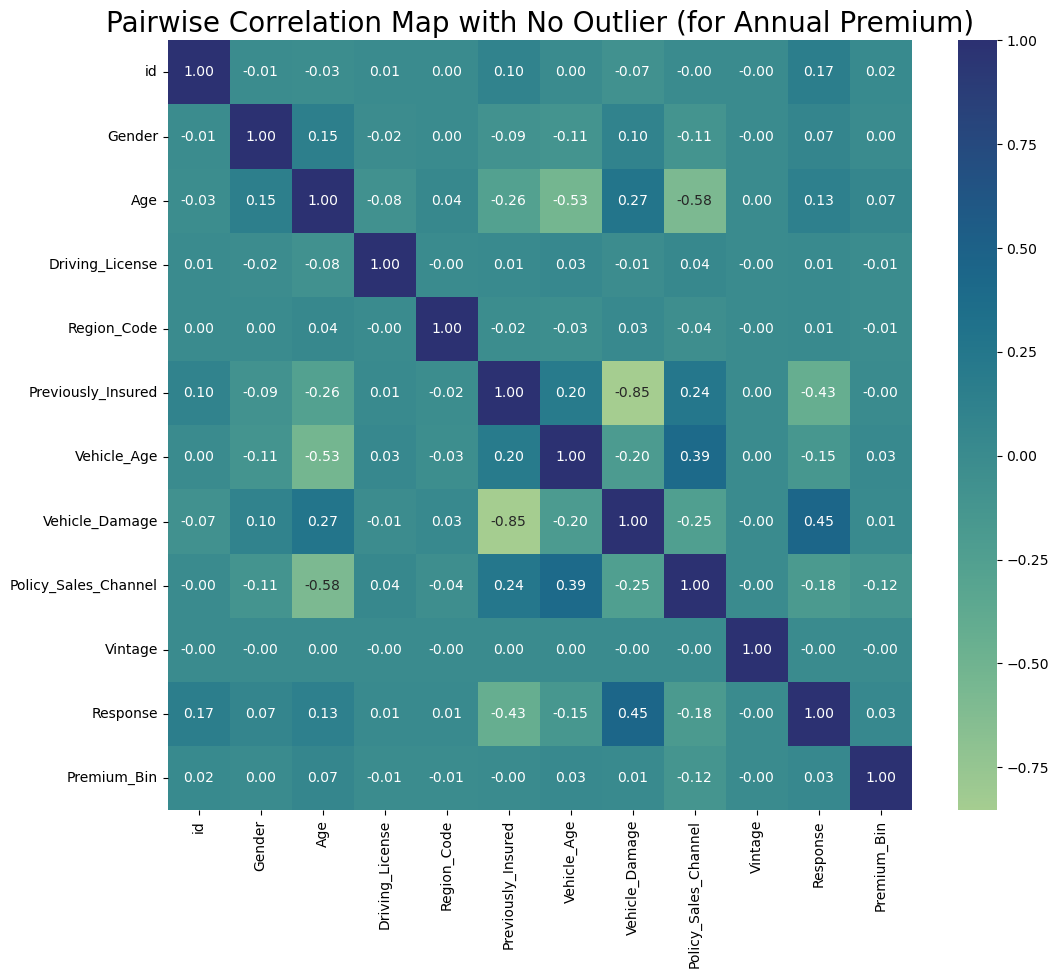

In [61]:
# Having analyzed all the data, let's revisit the pairwise correlation mapping 

plt.figure(figsize=(12,10))
sns.heatmap(df_no_outlier.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('Pairwise Correlation Map with No Outlier (for Annual Premium)', size = 20)
plt.show()

## Relationship - Region Code and Response - No Outliers

In [62]:
# Revisiting this with the outlier dataset - df_no_outlier

# There are 53 Region Codes. Let's review the relationship between Region Code and Response

# Explore relationship between Region Code and Response

region_unique = sorted(df_no_outlier.Region_Code.unique())
region_unique = np.array(region_unique, dtype=int)
# region_unique has the 53 unique region codes

region_response_values=df_no_outlier.groupby('Region_Code')['Response'].count().values
mean_resp=[]
for i,region in enumerate(region_unique):
    mean_resp.append(sum(df_no_outlier[df_no_outlier['Region_Code']==region].Response)/region_response_values[i])

mc = df_no_outlier.groupby('Region_Code')['Response'].mean()

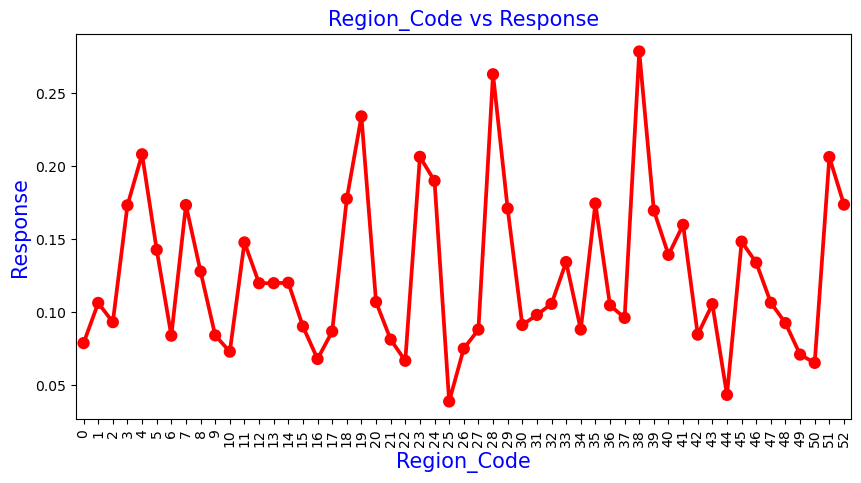

In [63]:
# Plotting this with the outlier dataset - df_no_outlier

plt.figure(figsize=(10,5))
sns.pointplot(x=region_unique,y=mean_resp,color='red') #,alpha=0.8
plt.xlabel('Region_Code',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Response',fontsize = 15,color='blue')
plt.title('Region_Code vs Response',fontsize = 15,color='blue')
plt.show()

Not much has changed but you will see that there is a good distribution for Annual Premium. The overall correlation and data distribution in comparison with other datasets have not changed much.

## Policy Sales Channel

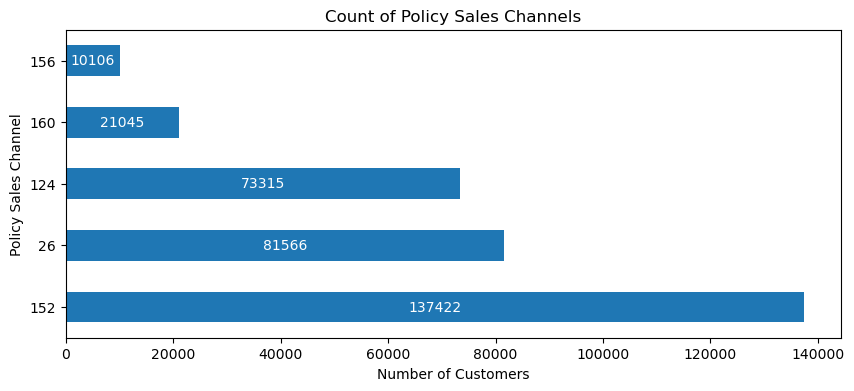

In [64]:
# Let's look at Policy Sales Channel Distribution for the customers

temp = df_train.groupby(['Policy_Sales_Channel'])['Policy_Sales_Channel'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Policy Sales Channels')
plt.xlabel('Number of Customers')
plt.ylabel('Policy Sales Channel')
plt.show()

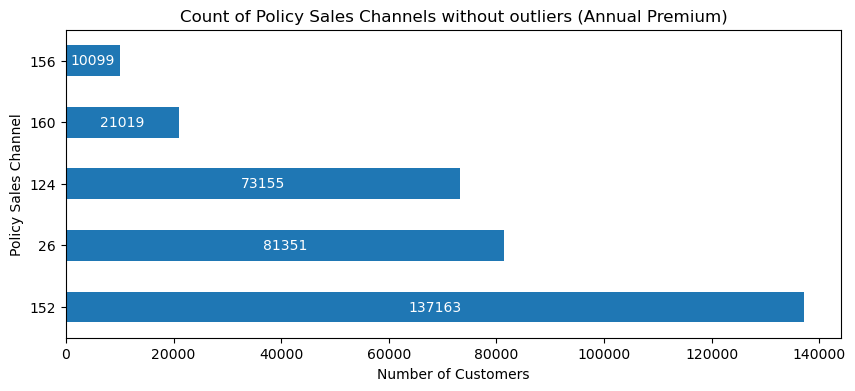

In [65]:
# Let's look at Policy Sales Channel Distribution for the customers without the outliers

temp = df_no_outlier.groupby(['Policy_Sales_Channel'])['Policy_Sales_Channel'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Policy Sales Channels without outliers (Annual Premium)')
plt.xlabel('Number of Customers')
plt.ylabel('Policy Sales Channel')
plt.show()

It shows almost the same distribution. One thing clear is that Policy Sales Channel 152 has a higher % of customers

## Region Code

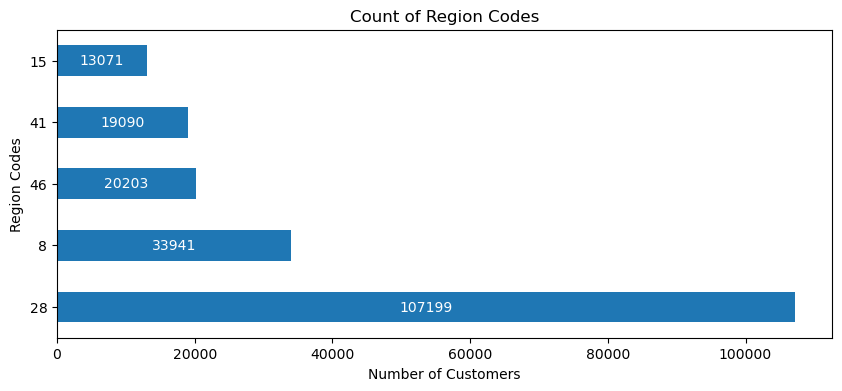

In [66]:
# Let's explore the same thing for Region Codes

temp = df_train.groupby(['Region_Code'])['Region_Code'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Region Codes')
plt.xlabel('Number of Customers')
plt.ylabel('Region Codes')
plt.show()

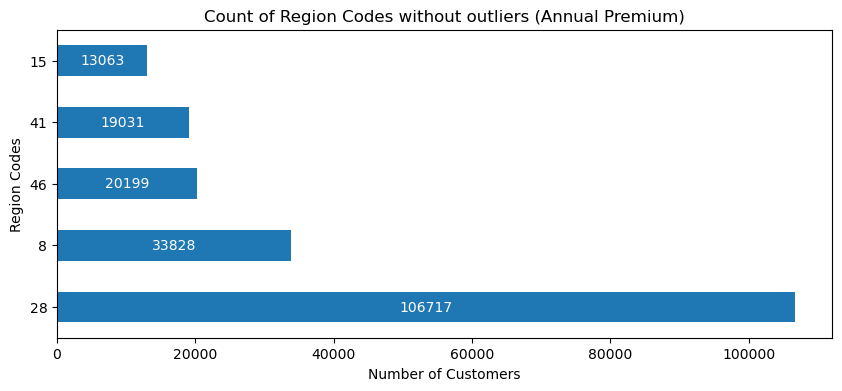

In [67]:
# Let's look at Policy Sales Channel Distribution for the customers without the outliers

temp = df_no_outlier.groupby(['Region_Code'])['Region_Code'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Region Codes without outliers (Annual Premium)')
plt.xlabel('Number of Customers')
plt.ylabel('Region Codes')
plt.show()

This also shows a clear difference in that Region Code 28, This has a higher % of customers in both sets (with and without outliers)

Thank You for reviewing my work. If you like then, please consider to upvote.

This is part 1 of the data analysis and machine learning process. Please look for my follow-up notebook that explores this data to perform some ML model validations

In [69]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [68]:
def encode_gender(x):
    if x == "Male":return 1
    else: return 0
df_train['Gender'] = df_train['Gender'].apply(lambda x: encode_gender(x), 1)

In [70]:
## Vehicle_Age
df_train['Vehicle_Age_< 1 Year'] = 0

In [78]:
for v_age in df_train['Vehicle_Age'].unique():
    df_train['Vehicle_Age' + v_age] = df_train['Vehicle_Age'].apply(lambda x: 1 if x == v_age else 0, 1)

In [77]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years
0,167647,1,22,1,7.0,1,< 1 Year,No,2630.0,152.0,0,0,0,0,0,0
1,17163,1,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,0,0,0,0,0,0
2,32023,0,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,0,0,0,0,0,0
3,87447,0,22,1,33.0,0,< 1 Year,No,27645.0,152.0,0,0,0,0,0,0
4,501933,1,28,1,46.0,1,< 1 Year,No,29023.0,152.0,0,0,0,0,0,0


In [76]:
df_train['Vintage'] = 0